**Equipo:**

* Luis Gabriel Martínez Rentería A01651812
* Miguel Alejandro Salas Reyna A00827219
* Roel Adrián De la Rosa Castillo A00827219
* Paola Balbuena Almanza A01652413
* Jose Andres Meyer Crabtree A01366785
* Francisco Leonid Galvez Flores A01174385

In [ ]:
import numpy as np


In [ ]:
maps = {
    5 : np.array([[565,575],[25,185],[345,750],[945,685],[845,655]],float),

    7 : np.array([[880,660],[25,230],[525,1000],[580,1175],[650,1130],[1605,620], [1220,580]],float),

    10 : np.array([[1465,200],[1530,5],[845,680],[725,370],[145,665],
            [415,635],[510,875],[560,365],[300,465],[520,585]],float)
}

# Algoritmo ACO para resolver TSP

## colonia de hormigas

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def euc_2d(c1, c2):
    """returns the rounded Euclidian distance between two 2D points"""
    return round(math.sqrt(sum((c1-c2) ** 2.0)))

In [ ]:
def cost(permutation, cities):
    """returns the length of a tour of cities"""
    distance = 0
    ncities = len(cities)
    for i in range(ncities):
        c1 = permutation[i]
        if i+1 == ncities:
            c2 = permutation[0]
        else:
            c2 = permutation[i+1]
        distance += euc_2d(cities[c1], cities[c2])
    return distance


In [ ]:
def random_permutation(cities):
    """generate a tour as a random permutation of cities"""
    perm = list(range(len(cities)))
    np.random.shuffle(perm)
    return perm

In [ ]:
def initialise_pheromone_matrix(num_cities, naive_score):
    """initialises the pheromone matrix"""
    v = num_cities / naive_score
    return v * np.ones(num_cities*num_cities).reshape((num_cities,num_cities))

In [ ]:
def calculate_choices(cities, last_city, exclude, pheromone, c_heur, c_hist):
    """calculate the selection probability for a group of cities"""
    choices = []
    for i,coord in enumerate(cities):
        if i in exclude: continue
        prob = {'city' : i}
        prob['history'] = pheromone[last_city, i] ** c_hist
        prob['distance'] = euc_2d(cities[last_city], coord)
        prob['heuristic'] = (1.0 / prob['distance']) ** c_heur
        prob['prob'] = prob['history'] * prob['heuristic']
        choices.append(prob)
    return choices

In [ ]:
def select_next_city(choices):
    """selects the next city for a partial tour"""
    psum = 0.0
    for element in choices: psum += element['prob']
    if psum == 0.0:
        return choices[np.random.randint(len(choices))]['city']
    v = np.random.random()
    for i,choice in enumerate(choices):
        v -= choice['prob'] / psum
        if v <= 0.0: return choice['city']
    return choices[-1]['city']

In [ ]:
def stepwise_const(cities, phero, c_heur, c_hist):
    """construct a tour for an ant"""
    ncities = len(cities)
    perm = []
    perm.append(np.random.randint(ncities))
    while len(perm) < ncities:
        choices = calculate_choices(cities, perm[-1], perm, phero, c_heur, c_hist)
        next_city = select_next_city(choices)
        perm.append(next_city)
    return perm


In [ ]:
def decay_pheromone(pheromone, decay_factor):
    """reduce all the pheromone values"""
    factor = 1.0 - decay_factor
    for i in range(len(pheromone)):
        for j in range(len(pheromone[0])):
            pheromone[i, j] *= factor

In [ ]:
def update_pheromone(pheromone, solutions):
    """increase the pheromone values in the ants tours"""
    for other in solutions:
        for i,x in enumerate(other['vector']):
            if i == len(other['vector'])-1:
                y = other['vector'][0]
            else:
                y = other['vector'][i+1]
            pheromone[x,y] += 1.0 / other['cost']
            pheromone[y,x] += 1.0 / other['cost']

In [ ]:
def draw_tour(tour, cities):
    """draws a plot of the tour"""
    xp = [cities[c,0] for c in tour] + [cities[tour[0],0]]
    yp = [cities[c,1] for c in tour] + [cities[tour[0],1]]
    plt.cla()
    plt.plot(xp,yp, xp,yp, 'ro')
    fig.canvas.draw()

In [ ]:
def ant_system(cities, max_it, num_ants, decay_factor, c_heur, c_hist):
    """implements an Ant System"""
    best = {'vector' : random_permutation(cities)}
    best['cost'] = cost(best['vector'], cities)
    pheromone = initialise_pheromone_matrix(len(cities), best['cost'])
    draw_tour(best['vector'], cities)
    for i in range(max_it):
        solutions = []
        for ant in range(num_ants):
            candidate = {}
            candidate['vector'] = stepwise_const(cities, pheromone, c_heur, c_hist)
            candidate['cost'] = cost(candidate['vector'], cities)
            if candidate['cost'] < best['cost']:
                best = candidate
                draw_tour(best['vector'], cities)
            solutions.append(candidate)
        decay_pheromone(pheromone, decay_factor)
        update_pheromone(pheromone, solutions)
        print(" > iteration=%d, best=%g" % (i+1,best['cost']))
    return best


 > iteration=1, best=2314
 > iteration=2, best=2314
 > iteration=3, best=2314
 > iteration=4, best=2314
 > iteration=5, best=2314
 > iteration=6, best=2314
 > iteration=7, best=2314
 > iteration=8, best=2314
 > iteration=9, best=2314
 > iteration=10, best=2314
 > iteration=11, best=2314
 > iteration=12, best=2314
 > iteration=13, best=2314
 > iteration=14, best=2314
 > iteration=15, best=2314
 > iteration=16, best=2314
 > iteration=17, best=2314
 > iteration=18, best=2314
 > iteration=19, best=2314
 > iteration=20, best=2314
 > iteration=21, best=2314
 > iteration=22, best=2314
 > iteration=23, best=2314
 > iteration=24, best=2314
 > iteration=25, best=2314
 > iteration=26, best=2314
 > iteration=27, best=2314
 > iteration=28, best=2314
 > iteration=29, best=2314
 > iteration=30, best=2314
 > iteration=31, best=2314
 > iteration=32, best=2314
 > iteration=33, best=2314
 > iteration=34, best=2314
 > iteration=35, best=2314
 > iteration=36, best=2314
 > iteration=37, best=2314
 > iterati

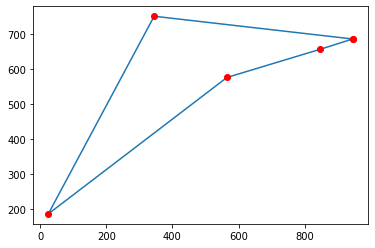

In [ ]:
max_it = 50 # maximum number of iterations
num_ants = 30  # number of ants
decay_factor = 0.6 # reduction of pheromone
c_heur = 2.5 # heuristic coefficient
c_hist = 1.0 # pheromone coefficient
# execute the algorithm
plt.ion()
fig = plt.figure()
best = ant_system(maps[5], max_it, num_ants, decay_factor, c_heur, c_hist)
print("Done.\nBest Solution: c=%g, v=%s" % (best['cost'], best['vector']))
plt.ioff()

 > iteration=1, best=3960
 > iteration=2, best=3960
 > iteration=3, best=3960
 > iteration=4, best=3960
 > iteration=5, best=3960
 > iteration=6, best=3960
 > iteration=7, best=3960
 > iteration=8, best=3960
 > iteration=9, best=3960
 > iteration=10, best=3960
 > iteration=11, best=3960
 > iteration=12, best=3960
 > iteration=13, best=3960
 > iteration=14, best=3960
 > iteration=15, best=3960
 > iteration=16, best=3960
 > iteration=17, best=3960
 > iteration=18, best=3960
 > iteration=19, best=3960
 > iteration=20, best=3960
 > iteration=21, best=3960
 > iteration=22, best=3960
 > iteration=23, best=3960
 > iteration=24, best=3960
 > iteration=25, best=3960
 > iteration=26, best=3960
 > iteration=27, best=3960
 > iteration=28, best=3960
 > iteration=29, best=3960
 > iteration=30, best=3960
 > iteration=31, best=3960
 > iteration=32, best=3960
 > iteration=33, best=3960
 > iteration=34, best=3960
 > iteration=35, best=3960
 > iteration=36, best=3960
 > iteration=37, best=3960
 > iterati

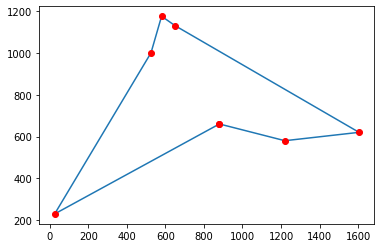

In [ ]:
plt.ion()
fig = plt.figure()
best = ant_system(maps[7], max_it, num_ants, decay_factor, c_heur, c_hist)
print("Done.\nBest Solution: c=%g, v=%s" % (best['cost'], best['vector']))
plt.ioff()

 > iteration=1, best=4067
 > iteration=2, best=3831
 > iteration=3, best=3646
 > iteration=4, best=3646
 > iteration=5, best=3646
 > iteration=6, best=3637
 > iteration=7, best=3637
 > iteration=8, best=3637
 > iteration=9, best=3637
 > iteration=10, best=3637
 > iteration=11, best=3637
 > iteration=12, best=3637
 > iteration=13, best=3637
 > iteration=14, best=3637
 > iteration=15, best=3637
 > iteration=16, best=3637
 > iteration=17, best=3637
 > iteration=18, best=3637
 > iteration=19, best=3637
 > iteration=20, best=3637
 > iteration=21, best=3637
 > iteration=22, best=3637
 > iteration=23, best=3637
 > iteration=24, best=3637
 > iteration=25, best=3637
 > iteration=26, best=3637
 > iteration=27, best=3637
 > iteration=28, best=3637
 > iteration=29, best=3637
 > iteration=30, best=3637
 > iteration=31, best=3637
 > iteration=32, best=3637
 > iteration=33, best=3637
 > iteration=34, best=3637
 > iteration=35, best=3637
 > iteration=36, best=3637
 > iteration=37, best=3637
 > iterati

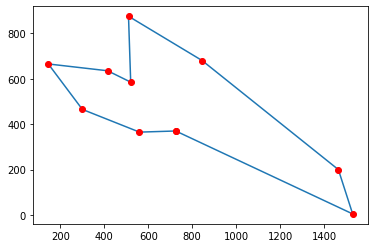

In [ ]:
plt.ion()
fig = plt.figure()
best = ant_system(maps[10], max_it, num_ants, decay_factor, c_heur, c_hist)
print("Done.\nBest Solution: c=%g, v=%s" % (best['cost'], best['vector']))
plt.ioff()

# Algoritmo PSO


In [ ]:
import random
import math
import matplotlib.pyplot as plt

In [ ]:
class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def distance(self, city):
        return math.hypot(self.x - city.x, self.y - city.y)

    def __repr__(self):
        return f"({self.x}, {self.y})"


In [ ]:
def read_cities(size):
  cities = []
  for c in maps[size]:
    x,y = c[0], c[1]
    cities.append(City(x,y))
  return cities

In [ ]:
def write_cities_and_return_them(size):
    cities = generate_cities(size)
    with open(f'cities_{size}.data', 'w+') as handle:
        for city in cities:
            handle.write(f'{city.x} {city.y}\n')
    return cities

In [ ]:
def generate_cities(size):
    return [City(x=int(random.random() * 1000), y=int(random.random() * 1000)) for _ in range(size)]

In [ ]:
def path_cost(route):
    return sum([city.distance(route[index - 1]) for index, city in enumerate(route)])

In [ ]:
def visualize_tsp(title, cities):
    fig = plt.figure()
    fig.suptitle(title)
    x_list, y_list = [], []
    for city in cities:
        x_list.append(city.x)
        y_list.append(city.y)
    x_list.append(cities[0].x)
    y_list.append(cities[0].y)

    plt.plot(x_list, y_list, 'ro')
    plt.plot(x_list, y_list, 'g')
    plt.show(block=True)

In [ ]:
class Particle:
    def __init__(self, route, cost=None):
        self.route = route
        self.pbest = route
        self.current_cost = cost if cost else self.path_cost()
        self.pbest_cost = cost if cost else self.path_cost()
        self.velocity = []

    def clear_velocity(self):
        self.velocity.clear()

    def update_costs_and_pbest(self):
        self.current_cost = self.path_cost()
        if self.current_cost < self.pbest_cost:
            self.pbest = self.route
            self.pbest_cost = self.current_cost

    def path_cost(self):
        return path_cost(self.route)


In [ ]:
class PSO:

    def __init__(self, iterations, population_size, gbest_probability=1.0, pbest_probability=1.0, cities=None):
        self.cities = cities
        self.gbest = None
        self.gcost_iter = []
        self.iterations = iterations
        self.population_size = population_size
        self.particles = []
        self.gbest_probability = gbest_probability
        self.pbest_probability = pbest_probability

        solutions = self.initial_population()
        self.particles = [Particle(route=solution) for solution in solutions]

    def random_route(self):
        return random.sample(self.cities, len(self.cities))

    def initial_population(self):
        random_population = [self.random_route() for _ in range(self.population_size - 1)]
        greedy_population = [self.greedy_route(0)]
        return [*random_population, *greedy_population]
        # return [*random_population]

    def greedy_route(self, start_index):
        unvisited = self.cities[:]
        del unvisited[start_index]
        route = [self.cities[start_index]]
        while len(unvisited):
            index, nearest_city = min(enumerate(unvisited), key=lambda item: item[1].distance(route[-1]))
            route.append(nearest_city)
            del unvisited[index]
        return route

    def run(self):
        self.gbest = min(self.particles, key=lambda p: p.pbest_cost)
        print(f"initial cost is {self.gbest.pbest_cost}")
        plt.ion()
        plt.draw()
        for t in range(self.iterations):
            self.gbest = min(self.particles, key=lambda p: p.pbest_cost)
            if t % 20 == 0:
                #plt.figure(0)
                #plt.plot(pso.gcost_iter, 'g')
                #plt.ylabel('Distance')
                #plt.xlabel('Generation')
                #fig = plt.figure(0)
                #fig.suptitle('pso iter')
                x_list, y_list = [], []
                for city in self.gbest.pbest:
                    x_list.append(city.x)
                    y_list.append(city.y)
                x_list.append(pso.gbest.pbest[0].x)
                y_list.append(pso.gbest.pbest[0].y)
                #0fig = plt.figure(1)
                #fig.clear()
                #fig.suptitle(f'pso TSP iter {t}')
                
                #plt.plot(x_list, y_list, 'ro')
                #plt.plot(x_list, y_list, 'g')
                #plt.draw()
                #plt.pause(.001)
            self.gcost_iter.append(self.gbest.pbest_cost)

            for particle in self.particles:
                particle.clear_velocity()
                temp_velocity = []
                gbest = self.gbest.pbest[:]
                new_route = particle.route[:]

                for i in range(len(self.cities)):
                    if new_route[i] != particle.pbest[i]:
                        swap = (i, particle.pbest.index(new_route[i]), self.pbest_probability)
                        temp_velocity.append(swap)
                        new_route[swap[0]], new_route[swap[1]] = \
                            new_route[swap[1]], new_route[swap[0]]

                for i in range(len(self.cities)):
                    if new_route[i] != gbest[i]:
                        swap = (i, gbest.index(new_route[i]), self.gbest_probability)
                        temp_velocity.append(swap)
                        gbest[swap[0]], gbest[swap[1]] = gbest[swap[1]], gbest[swap[0]]

                particle.velocity = temp_velocity

                for swap in temp_velocity:
                    if random.random() <= swap[2]:
                        new_route[swap[0]], new_route[swap[1]] = \
                            new_route[swap[1]], new_route[swap[0]]

                particle.route = new_route
                particle.update_costs_and_pbest()

initial cost is 2314.5526975124203
cost: 2314.5526975124203	| gbest: [(25.0, 185.0), (565.0, 575.0), (845.0, 655.0), (945.0, 685.0), (345.0, 750.0)]


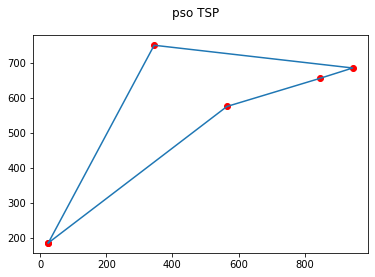

In [ ]:
cities = read_cities(5)
pso = PSO(iterations=1200, population_size=300, pbest_probability=0.9, gbest_probability=0.02, cities=cities)
pso.run()
print(f'cost: {pso.gbest.pbest_cost}\t| gbest: {pso.gbest.pbest}')

x_list, y_list = [], []
for city in pso.gbest.pbest:
    x_list.append(city.x)
    y_list.append(city.y)
x_list.append(pso.gbest.pbest[0].x)
y_list.append(pso.gbest.pbest[0].y)
fig = plt.figure(1)
fig.suptitle('pso TSP')

plt.plot(x_list, y_list, 'ro')
plt.plot(x_list, y_list)
plt.show(block=True)

initial cost is 3960.79605753847
cost: 3960.79605753847	| gbest: [(25.0, 230.0), (880.0, 660.0), (1220.0, 580.0), (1605.0, 620.0), (650.0, 1130.0), (580.0, 1175.0), (525.0, 1000.0)]


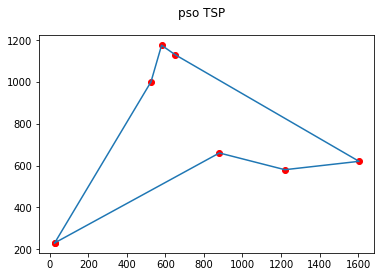

In [ ]:
cities = read_cities(7)
pso = PSO(iterations=1200, population_size=300, pbest_probability=0.9, gbest_probability=0.02, cities=cities)
pso.run()
print(f'cost: {pso.gbest.pbest_cost}\t| gbest: {pso.gbest.pbest}')

x_list, y_list = [], []
for city in pso.gbest.pbest:
    x_list.append(city.x)
    y_list.append(city.y)
x_list.append(pso.gbest.pbest[0].x)
y_list.append(pso.gbest.pbest[0].y)
fig = plt.figure(1)
fig.suptitle('pso TSP')

plt.plot(x_list, y_list, 'ro')
plt.plot(x_list, y_list)
plt.show(block=True)

initial cost is 3645.499002803538
cost: 3635.950379141587	| gbest: [(1530.0, 5.0), (1465.0, 200.0), (845.0, 680.0), (510.0, 875.0), (520.0, 585.0), (415.0, 635.0), (145.0, 665.0), (300.0, 465.0), (560.0, 365.0), (725.0, 370.0)]


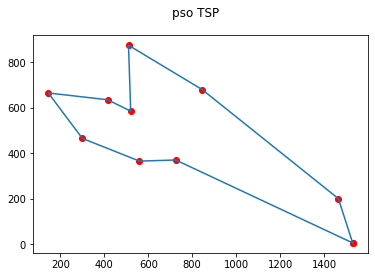

In [ ]:
cities = read_cities(10)
pso = PSO(iterations=1200, population_size=300, pbest_probability=0.9, gbest_probability=0.02, cities=cities)
pso.run()
print(f'cost: {pso.gbest.pbest_cost}\t| gbest: {pso.gbest.pbest}')

x_list, y_list = [], []
for city in pso.gbest.pbest:
    x_list.append(city.x)
    y_list.append(city.y)
x_list.append(pso.gbest.pbest[0].x)
y_list.append(pso.gbest.pbest[0].y)
fig = plt.figure(1)
fig.suptitle('pso TSP')

plt.plot(x_list, y_list, 'ro')
plt.plot(x_list, y_list)
plt.show(block=True)

#Comparación

Entre los diferentes algoritmos que hemos trabajado, desde fuerza bruta hasta los de este documento, siempre se ha podido llegar a una solución óptima, en algunos casos como en Hill Climbing se llegaba a una solución corta, pero no siempre era la mejor solución. En los algoritmos que hemos trabajado hoy podemos ver que siempre se llega a la solución más óptima, ya que despues de varias generaciones no se mejoran los resultados, aunque tambien queda destacar que la cantidad de datos que se estan trabajando no es muy alta, por lo que los tiempos de solución no son los mejores, para eso los algoritmos de las actividaddes pasadas nos dan resultados en menos tiempo, y en esta, aunque es mucho más sencillo encontrar el tiempo más óptimo para un problema TSP de 5 ciudades que para uno de 10, el algoritmo se tarda lo mismo 

#Optimización de una función matemática

In [ ]:
import numpy as np
import random
import warnings
import random
import copy
import pandas as pd
import time
from datetime import datetime

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:

class Particula:
    """Esta clase representa nueva partícula con una posición inicial definida por
    una combinación de valores numéricos aleatorios y velocidad de 0. El rango
    de posibles valores para cada variable (posición) puede estar acotado. Al
    crear una nueva partícula, solo se dispone de información sobre su posición 
    inicial y velocidad, el resto de atributos están vacíos.
    """
    
    def __init__(self, n_variables, limites_inf=None, limites_sup=None,
                 verbose=False):

        # Número de variables de la partícula
        self.n_variables = n_variables
        # Límite inferior de cada variable
        self.limites_inf = limites_inf
        # Límite superior de cada variable
        self.limites_sup = limites_sup
        # Posición de la partícula
        self.posicion = np.repeat(None, n_variables)
        # Velocidad de la parícula
        self.velocidad = np.repeat(None, n_variables)
        # Valor de la partícula
        self.valor = np.repeat(None, 1)
        # Mejor valor que ha tenido la partícula hasta el momento
        self.mejor_valor = None
        # Mejor posición en la que ha estado la partícula hasta el momento
        self.mejor_posicion = None
        
        # CONVERSIONES DE TIPO INICIALES
        # ----------------------------------------------------------------------
        # Si limites_inf o limites_sup no son un array numpy, se convierten en
        # ello.
        if self.limites_inf is not None \
        and not isinstance(self.limites_inf,np.ndarray):
            self.limites_inf = np.array(self.limites_inf)

        if self.limites_sup is not None \
        and not isinstance(self.limites_sup,np.ndarray):
            self.limites_sup = np.array(self.limites_sup)
        
        # COMPROBACIONES INICIALES: EXCEPTIONS Y WARNINGS
        # ----------------------------------------------------------------------
        if self.limites_inf is not None \
        and len(self.limites_inf) != self.n_variables:
            raise Exception(
                "limites_inf debe tener un valor por cada variable. " +
                "Si para alguna variable no se quiere límite, emplear None. " +
                "Ejemplo: limites_inf = [10, None, 5]"
                )
        elif self.limites_sup is not None \
        and len(self.limites_sup) != self.n_variables:
            raise Exception(
                "limites_sup debe tener un valor por cada variable. " +
                "Si para alguna variable no se quiere límite, emplear None. " +
                "Ejemplo: limites_sup = [10, None, 5]"
                )
        elif (self.limites_inf is None) or (self.limites_sup is None):
            warnings.warn(
                "Es altamente recomendable indicar los límites dentro de los " + 
                "cuales debe buscarse la solución de cada variable. " + 
                "Por defecto se emplea [-10^3, 10^3]."
                )
        elif any(np.concatenate((self.limites_inf, self.limites_sup)) == None):
            warnings.warn(
                "Los límites empleados por defecto cuando no se han definido " +
                "son: [-10^3, 10^3]."
            )

        # COMPROBACIONES INICIALES: ACCIONES
        # ----------------------------------------------------------------------

        # Si no se especifica limites_inf, el valor mínimo que pueden tomar las 
        # variables es -10^3.
        if self.limites_inf is None:
            self.limites_inf = np.repeat(-10**3, self.n_variables)

        # Si no se especifica limites_sup, el valor máximo que pueden tomar las 
        # variables es 10^3.
        if self.limites_sup is None:
             self.limites_sup = np.repeat(+10**3, self.n_variables)
            
        # Si los límites no son nulos, se reemplazan aquellas posiciones None por
        # el valor por defecto -10^3 y 10^3.
        if self.limites_inf is not None:
            self.limites_inf[self.limites_inf == None] = -10**3
           
        if self.limites_sup is not None:
            self.limites_sup[self.limites_sup == None] = +10**3
        
        # BUCLE PARA ASIGNAR UN VALOR A CADA UNA DE LAS VARIABLES QUE DEFINEN LA
        # POSICIÓN
        # ----------------------------------------------------------------------
        for i in np.arange(self.n_variables):
        # Para cada posición, se genera un valor aleatorio dentro del rango
        # permitido para esa variable.
            self.posicion[i] = random.uniform(
                                    self.limites_inf[i],
                                    self.limites_sup[i]
                                )

        # LA VELOCIDAD INICIAL DE LA PARTÍCULA ES 0
        # ----------------------------------------------------------------------
        self.velocidad = np.repeat(0, self.n_variables)

        # INFORMACIÓN DEL PROCESO (VERBOSE)
        # ----------------------------------------------------------------------
        if verbose:
            print("Nueva partícula creada")
            print("----------------------")
            print("Posición: " + str(self.posicion))
            print("Límites inferiores de cada variable: " \
                  + str(self.limites_inf))
            print("Límites superiores de cada variable: " \
                  + str(self.limites_sup))
            print("Velocidad: " + str(self.velocidad))
            print("")

    def __repr__(self):
        """
        Información que se muestra cuando se imprime un objeto partícula.

        """

        texto = "Partícula" \
                + "\n" \
                + "---------" \
                + "\n" \
                + "Posición: " + str(self.posicion) \
                + "\n" \
                + "Velocidad: " + str(self.velocidad) \
                + "\n" \
                + "Mejor posicion: " + str(self.mejor_posicion) \
                + "\n" \
                + "Mejor valor: " + str(self.mejor_valor) \
                + "\n" \
                + "Límites inferiores de cada variable: " \
                + str(self.limites_inf) \
                + "\n" \
                + "Límites superiores de cada variable: " \
                + str(self.limites_sup) \
                + "\n"

        return(texto)

    def evaluar_particula(self, funcion_objetivo, optimizacion, verbose = False):
        """Este método evalúa una partícula calculando el valor que toma la
        función objetivo en la posición en la que se encuentra. Además, compara
        si la nueva posición es mejor que las anteriores. Modifica los atributos
        valor, mejor_valor y mejor_posicion de la partícula.
        """

        # COMPROBACIONES INICIALES: EXCEPTIONS Y WARNINGS
        # ----------------------------------------------------------------------
        if not optimizacion in ["maximizar", "minimizar"]:
            raise Exception(
                "El argumento optimizacion debe ser: maximizar o minimizar"
                )

        # EVALUACIÓN DE LA FUNCIÓN OBJETIVO EN LA POSICIÓN ACTUAL
        # ----------------------------------------------------------------------
        self.valor = funcion_objetivo(*self.posicion)

        # MEJOR VALOR Y POSICIÓN
        # ----------------------------------------------------------------------
        # Se compara el valor actual con el mejor valor histórico. La comparación
        # es distinta dependiendo de si se desea maximizar o minimizar.
        # Si no existe ningún valor histórico, se almacena el actual. Si ya existe
        # algún valor histórico se compara con el actual y, de ser mejor este
        # último, se sobrescribe.
        
        if self.mejor_valor is None:
            self.mejor_valor    = np.copy(self.valor)
            self.mejor_posicion = np.copy(self.posicion)
        else:
            if optimizacion == "minimizar":
                if self.valor < self.mejor_valor:
                    self.mejor_valor    = np.copy(self.valor)
                    self.mejor_posicion = np.copy(self.posicion)
            else:
                if self.valor > self.mejor_valor:
                    self.mejor_valor    = np.copy(self.valor)
                    self.mejor_posicion = np.copy(self.posicion)

        # INFORMACIÓN DEL PROCESO (VERBOSE)
        # ----------------------------------------------------------------------
        if verbose:
            print("La partícula ha sido evaluada")
            print("-----------------------------")
            print("Valor actual: " + str(self.valor))
            print("")

    def mover_particula(self, mejor_p_enjambre, inercia=0.8, peso_cognitivo=2,
                        peso_social=2, verbose=False):
        """
        Este método ejecuta el movimiento de una partícula, lo que implica
        actualizar su velocidad y posición. No se permite que la partícula
        salga de la zona de búsqueda acotada por los límites.
        """

        # ACTUALIZACIÓN DE LA VELOCIDAD
        # ----------------------------------------------------------------------
        componente_velocidad = inercia * self.velocidad
        r1 = np.random.uniform(low=0.0, high=1.0, size = len(self.velocidad))
        r2 = np.random.uniform(low=0.0, high=1.0, size = len(self.velocidad))
        componente_cognitivo = peso_cognitivo * r1 * (self.mejor_posicion \
                                                      - self.posicion)
        componente_social = peso_social * r2 * (mejor_p_enjambre \
                                                - self.posicion)
        nueva_velocidad = componente_velocidad + componente_cognitivo \
                          + componente_social
        self.velocidad = np.copy(nueva_velocidad)
        
        # ACTUALIZACIÓN DE LA POSICIÓN
        # ----------------------------------------------------------------------
        self.posicion = self.posicion + self.velocidad

        # COMPROBAR LÍMITES
        # ----------------------------------------------------------------------
        # Se comprueba si algún valor de la nueva posición supera los límites
        # impuestos. En tal caso, se sobrescribe con el valor del límite
        # correspondiente y se reinicia a 0 la velocidad de la partícula en esa
        # componente.
        for i in np.arange(len(self.posicion)):
            if self.posicion[i] < self.limites_inf[i]:
                self.posicion[i] = self.limites_inf[i]
                self.velocidad[i] = 0

            if self.posicion[i] > self.limites_sup[i]:
                self.posicion[i] = self.limites_sup[i]
                self.velocidad[i] = 0
                
        # INFORMACIÓN DEL PROCESO (VERBOSE)
        # ----------------------------------------------------------------------
        if verbose:
            print("La partícula se ha desplazado")
            print("-----------------------------")
            print("Nueva posición: " + str(self.posicion))
            print("")

In [ ]:
class Enjambre:

    #Esta clase crea un enjambre de n partículas. El rango de posibles valores
    #para cada variable (posición) puede estar acotado.


    def __init__(self, n_particulas, n_variables, limites_inf = None,
                 limites_sup = None, verbose = False):

        # Número de partículas del enjambre
        self.n_particulas = n_particulas
        # Número de variables de cada partícula
        self.n_variables = n_variables
        # Límite inferior de cada variable
        self.limites_inf = limites_inf
        # Límite superior de cada variable
        self.limites_sup = limites_sup
        # Verbose
        self.verbose = verbose
        # Lista de las partículas del enjambre
        self.particulas = []
        # Etiqueta para saber si el enjambre ha sido optimizado
        self.optimizado = False
        # Número de iteraciones de optimización llevadas a cabo
        self.iter_optimizacion = None
        # Mejor partícula del enjambre
        self.mejor_particula = None
        # Mejor valor del enjambre
        self.mejor_valor = None
        # Posición del mejor valor del enjambre.
        self.mejor_posicion = None
        # Estado de todas las partículas del enjambre en cada iteración.
        self.historico_particulas = []
        # Mejor posición en cada iteración.
        self.historico_mejor_posicion = []
        # Mejor valor en cada iteración.
        self.historico_mejor_valor = []
        # Diferencia absoluta entre el mejor valor de iteraciones consecutivas.
        self.diferencia_abs = []
        # data.frame con la información del mejor valor y posición encontrado en
        # cada iteración, así como la mejora respecto a la iteración anterior.
        self.resultados_df = None
        # Mejor valor de todas las iteraciones
        self.valor_optimo = None
        # Mejor posición de todas las iteraciones
        self.posicion_optima = None

        # CONVERSIONES DE TIPO INICIALES
        # ----------------------------------------------------------------------
        # Si limites_inf o limites_sup no son un array numpy, se convierten en
        # ello.
        if self.limites_inf is not None \
        and not isinstance(self.limites_inf,np.ndarray):
            self.limites_inf = np.array(self.limites_inf)

        if self.limites_sup is not None \
        and not isinstance(self.limites_sup,np.ndarray):
            self.limites_sup = np.array(self.limites_sup)

        # SE CREAN LAS PARTÍCULAS DEL ENJAMBRE Y SE ALMACENAN
        # ----------------------------------------------------------------------
        for i in np.arange(n_particulas):
            particula_i = Particula(
                            n_variables = self.n_variables,
                            limites_inf = self.limites_inf,
                            limites_sup = self.limites_sup,
                            verbose     = self.verbose
                          )
            self.particulas.append(particula_i)

        # INFORMACIÓN DEL PROCESO (VERBOSE)
        # ----------------------------------------------------------------------
        if verbose:
            print("---------------")
            print("Enjambre creado")
            print("---------------")
            print("Número de partículas: " + str(self.n_particulas))
            print("Límites inferiores de cada variable: " \
                  + np.array2string(self.limites_inf))
            print("Límites superiores de cada variable: " \
                  + np.array2string(self.limites_sup))
            print("")

    def __repr__(self):
        """
        Información que se muestra cuando se imprime un objeto enjambre.

        """

        texto = "============================" \
                + "\n" \
                + "         Enjambre" \
                + "\n" \
                + "============================" \
                + "\n" \
                + "Número de partículas: " + str(self.n_particulas) \
                + "\n" \
                + "Límites inferiores de cada variable: " + str(self.limites_inf) \
                + "\n" \
                + "Límites superiores de cada variable: " + str(self.limites_sup) \
                + "\n" \
                + "Optimizado: " + str(self.optimizado) \
                + "\n" \
                + "Iteraciones optimización: " + str(self.iter_optimizacion) \
                + "\n" \
                + "\n" \
                + "Información mejor partícula:" \
                + "\n" \
                + "----------------------------" \
                + "\n" \
                + "Mejor posición actual: " + str(self.mejor_posicion) \
                + "\n" \
                + "Mejor valor actual: " + str(self.mejor_valor) \
                + "\n" \
                + "\n" \
                + "Resultados tras optimizar:" \
                + "\n" \
                + "----------------------------" \
                + "\n" \
                + "Posición óptima: " + str(self.posicion_optima) \
                + "\n" \
                + "Valor óptimo: " + str(self.valor_optimo)
                
        return(texto)

    def mostrar_particulas(self, n=None):

        #Este método muestra la información de cada una de las n primeras 
        #partículas del enjambre.


        if n is None:
            n = self.n_particulas
        elif n > self.n_particulas:
            n = self.n_particulas

        for i in np.arange(n):
            print(self.particulas[i])
        return(None)

    def evaluar_enjambre(self, funcion_objetivo, optimizacion, verbose = False):
        
        #Este método evalúa todas las partículas del enjambre, actualiza sus
        #valores e identifica la mejor partícula.

        # SE EVALÚA CADA PARTÍCULA DEL ENJAMBRE
        # ----------------------------------------------------------------------
        for i in np.arange(self.n_particulas):
            self.particulas[i].evaluar_particula(
                funcion_objetivo = funcion_objetivo,
                optimizacion     = optimizacion,
                verbose          = verbose
                )

        # MEJOR PARTÍCULA DEL ENJAMBRE
        # ----------------------------------------------------------------------
        # Se identifica la mejor partícula de todo el enjambre. Si se está
        # maximizando, la mejor partícula es aquella con mayor valor.
        # Lo contrario si se está minimizando.

        # Se selecciona inicialmente como mejor partícula la primera.
        self.mejor_particula =  copy.deepcopy(self.particulas[0])
        # Se comparan todas las partículas del enjambre.
        for i in np.arange(self.n_particulas):
            if optimizacion == "minimizar":
                if self.particulas[i].valor < self.mejor_particula.valor:
                    self.mejor_particula = copy.deepcopy(self.particulas[i])
            else:
                if self.particulas[i].valor > self.mejor_particula.valor:
                    self.mejor_particula = copy.deepcopy(self.particulas[i])

        # Se extrae la posición y valor de la mejor partícula y se almacenan
        # como mejor valor y posición del enjambre.
        self.mejor_valor    = self.mejor_particula.valor
        self.mejor_posicion = self.mejor_particula.posicion

        # INFORMACIÓN DEL PROCESO (VERBOSE)
        # ----------------------------------------------------------------------
        if verbose:
            print("-----------------")
            print("Enjambre evaluado")
            print("-----------------")
            print("Mejor posición encontrada : "
                  + np.array2string(self.mejor_posicion))
            print("Mejor valor encontrado : " + str(self.mejor_valor))
            print("")

    def mover_enjambre(self, inercia, peso_cognitivo, peso_social,
                       verbose = False):
        
        #Este método mueve todas las partículas del enjambre.


        # Se actualiza la posición de cada una de las partículas que forman el
        # enjambre.
        for i in np.arange(self.n_particulas):
            self.particulas[i].mover_particula(
                mejor_p_enjambre = self.mejor_posicion,
                inercia          = inercia,
                peso_cognitivo   = peso_cognitivo,
                peso_social      = peso_social,
                verbose          = verbose
            )

        # Información del proceso (VERBOSE)
        # ----------------------------------------------------------------------
        if verbose:
            print("---------------------------------------------------------" \
                  "------------")
            print("La posición de todas las partículas del enjambre ha sido " \
                  "actualizada.")
            print("---------------------------------------------------------" \
            "------------")
            print("")


    def optimizar(self, funcion_objetivo, optimizacion, n_iteraciones = 50,
                  inercia = 0.8, reduc_inercia = True, inercia_max = 0.9,
                  inercia_min = 0.4, peso_cognitivo = 2, peso_social = 2,
                  parada_temprana = False, rondas_parada = None,
                  tolerancia_parada  = None, verbose = False):

        #Este método realiza el proceso de optimización de un enjambre.


        # COMPROBACIONES INICIALES: EXCEPTIONS Y WARNINGS
        # ----------------------------------------------------------------------
        # Si se activa la parada temprana, hay que especificar los argumentos
        # rondas_parada y tolerancia_parada.
        if parada_temprana \
        and (rondas_parada is None or tolerancia_parada is None):
            raise Exception(
                "Para activar la parada temprana es necesario indicar un " \
                + " valor de rondas_parada y de tolerancia_parada."
                )
        
        # Si se activa la reducción de inercia, hay que especificar los argumentos
        # inercia_max y inercia_min.
        if reduc_inercia \
        and (inercia_max is None or inercia_min is None):
            raise Exception(
            "Para activar la reducción de inercia es necesario indicar un " \
            + "valor de inercia_max y de inercia_min."
            )

        # ITERACIONES
        # ----------------------------------------------------------------------
        start = time.time()

        for i in np.arange(n_iteraciones):
            if verbose:
                print("-------------")
                print("Iteracion: " + str(i))
                print("-------------")
            
            # EVALUAR PARTÍCULAS DEL ENJAMBRE
            # ------------------------------------------------------------------
            enjambre.evaluar_enjambre(
                funcion_objetivo = funcion_objetivo,
                optimizacion     = "minimizar",
                verbose          = verbose
                )

            # SE ALMACENA LA INFORMACIÓN DE LA ITERACIÓN EN LOS HISTÓRICOS
            # ------------------------------------------------------------------
            self.historico_particulas.append(copy.deepcopy(self.particulas))
            self.historico_mejor_posicion.append(copy.deepcopy(self.mejor_posicion))
            self.historico_mejor_valor.append(copy.deepcopy(self.mejor_valor))

            # SE CALCULA LA DIFERENCIA ABSOLUTA RESPECTO A LA ITERACION ANTERIOR
            # ------------------------------------------------------------------
            # La diferencia solo puede calcularse a partir de la segunda
            # iteración.
            if i == 0:
                self.diferencia_abs.append(None)
            else:
                diferencia = abs(self.historico_mejor_valor[i] \
                                 - self.historico_mejor_valor[i-1])
                self.diferencia_abs.append(diferencia)

            # CRITERIO DE PARADA
            # ------------------------------------------------------------------
            # Si durante las últimas n generaciones, la diferencia absoluta entre
            # mejores partículas no es superior al valor de tolerancia_parada,
            # se detiene el algoritmo y no se crean nuevas generaciones.
            if parada_temprana and i > rondas_parada:
                ultimos_n = np.array(self.diferencia_abs[-(rondas_parada): ])
                if all(ultimos_n < tolerancia_parada):
                    print("Algoritmo detenido en la iteracion " 
                          + str(i) \
                          + " por falta cambio absoluto mínimo de " \
                          + str(tolerancia_parada) \
                          + " durante " \
                          + str(rondas_parada) \
                          + " iteraciones consecutivas.")
                    break
            
            # MOVER PARTÍCULAS DEL ENJAMBRE
            # ------------------------------------------------------------------
            # Si se ha activado la reducción de inercia, se recalcula su valor 
            # para la iteración actual.
            if reduc_inercia:
                inercia = ((inercia_max - inercia_min) \
                          * (n_iteraciones-i)/n_iteraciones) \
                          + inercia_min
           
            enjambre.mover_enjambre(
               inercia        = inercia,
               peso_cognitivo = peso_cognitivo,
               peso_social    = peso_social,
               verbose        = False
            )

        end = time.time()
        self.optimizado = True
        self.iter_optimizacion = i
        
        # IDENTIFICACIÓN DEL MEJOR INDIVIDUO DE TODO EL PROCESO
        # ----------------------------------------------------------------------
        indice_valor_optimo  = np.argmin(np.array(self.historico_mejor_valor))
        self.valor_optimo    = self.historico_mejor_valor[indice_valor_optimo]
        self.posicion_optima = self.historico_mejor_posicion[indice_valor_optimo]
        
        # CREACIÓN DE UN DATAFRAME CON LOS RESULTADOS
        # ----------------------------------------------------------------------
        self.resultados_df = pd.DataFrame(
            {
            "mejor_valor_enjambre"   : self.historico_mejor_valor,
            "mejor_posicion_enjambre": self.historico_mejor_posicion,
            "diferencia_abs"         : self.diferencia_abs
            }
        )
        self.resultados_df["iteracion"] = self.resultados_df.index
        
        print("-------------------------------------------")
        print("Optimización finalizada " \
              + datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
        print("-------------------------------------------")
        print("Duración optimización: " + str(end - start))
        print("Número de iteraciones: " + str(self.iter_optimizacion))

In [ ]:
# Ejemplo creación partícula.
part = Particula(
        n_variables = 3,
        limites_inf = [4,10,20],
        limites_sup = [-1,2,5],
        verbose     = True
        )
part

Nueva partícula creada
----------------------
Posición: [2.664226272313336 8.6538504172251 10.693063227527675]
Límites inferiores de cada variable: [ 4 10 20]
Límites superiores de cada variable: [-1  2  5]
Velocidad: [0 0 0]



Partícula
---------
Posición: [2.664226272313336 8.6538504172251 10.693063227527675]
Velocidad: [0 0 0]
Mejor posicion: None
Mejor valor: None
Límites inferiores de cada variable: [ 4 10 20]
Límites superiores de cada variable: [-1  2  5]

In [ ]:
# Ejemplo evaluar partícula con una función objetivo
def funcion_objetivo(x_0, x_1, x_2):
    f= x_0**2 + x_1**2 + x_2**2
    return(f)

part.evaluar_particula(
    funcion_objetivo = funcion_objetivo,
    optimizacion = "maximizar",
    verbose     = True
    )

# Hasta que la partícula se mueva, el valor actual y mejor valor es el mismo.
part

La partícula ha sido evaluada
-----------------------------
Valor actual: 196.32882986169622



Partícula
---------
Posición: [2.664226272313336 8.6538504172251 10.693063227527675]
Velocidad: [0 0 0]
Mejor posicion: [2.664226272313336 8.6538504172251 10.693063227527675]
Mejor valor: 196.32882986169622
Límites inferiores de cada variable: [ 4 10 20]
Límites superiores de cada variable: [-1  2  5]

In [ ]:
# Ejemplo mover partícula
part.mover_particula(
    mejor_p_enjambre = np.array([-1000,-1000,+1000]),
    inercia          = 0.8,
    peso_cognitivo   = 2,
    peso_social      = 2,
    verbose          = True
    )

part

La partícula se ha desplazado
-----------------------------
Nueva posición: [-1 2 5]



Partícula
---------
Posición: [-1 2 5]
Velocidad: [0 0 0]
Mejor posicion: [2.664226272313336 8.6538504172251 10.693063227527675]
Mejor valor: 196.32882986169622
Límites inferiores de cada variable: [ 4 10 20]
Límites superiores de cada variable: [-1  2  5]

In [ ]:
# Ejemplo crear enjambre
enjambre = Enjambre(
               n_particulas = 4,
               n_variables  = 3,
               limites_inf  = [-5,-5,-5],
               limites_sup  = [5,5,5],
               verbose      = True
            )

Nueva partícula creada
----------------------
Posición: [0.7534033789084056 0.24616176467468254 2.8718400518548926]
Límites inferiores de cada variable: [-5 -5 -5]
Límites superiores de cada variable: [5 5 5]
Velocidad: [0 0 0]

Nueva partícula creada
----------------------
Posición: [-2.712860962549507 -3.79363741827666 4.243757893377321]
Límites inferiores de cada variable: [-5 -5 -5]
Límites superiores de cada variable: [5 5 5]
Velocidad: [0 0 0]

Nueva partícula creada
----------------------
Posición: [-4.697576979665877 3.3089522590644247 -3.8676085761528545]
Límites inferiores de cada variable: [-5 -5 -5]
Límites superiores de cada variable: [5 5 5]
Velocidad: [0 0 0]

Nueva partícula creada
----------------------
Posición: [-1.887992280786638 4.341275368016742 -4.353224025385182]
Límites inferiores de cada variable: [-5 -5 -5]
Límites superiores de cada variable: [5 5 5]
Velocidad: [0 0 0]

---------------
Enjambre creado
---------------
Número de partículas: 4
Límites inferiore

In [ ]:
# Ejemplo evaluar enjambre
def funcion_objetivo(x_0, x_1, x_2):
    f= x_0**2 + x_1**2 + x_2**2
    return(f)

enjambre.evaluar_enjambre(
    funcion_objetivo = funcion_objetivo,
    optimizacion     = "minimizar",
    verbose          = True
    )

La partícula ha sido evaluada
-----------------------------
Valor actual: 8.875677549176268

La partícula ha sido evaluada
-----------------------------
Valor actual: 39.76078052107616

La partícula ha sido evaluada
-----------------------------
Valor actual: 47.97479063098545

La partícula ha sido evaluada
-----------------------------
Valor actual: 41.36174608844959

-----------------
Enjambre evaluado
-----------------
Mejor posición encontrada : [0.7534033789084056 0.24616176467468254 2.8718400518548926]
Mejor valor encontrado : 8.875677549176268



In [ ]:
# Ejemplo mover enjambre
enjambre.mover_enjambre(
    inercia          = 0.8,
    peso_cognitivo   = 2,
    peso_social      = 2,
    verbose          = True
)

La partícula se ha desplazado
-----------------------------
Nueva posición: [0.7534033789084056 0.24616176467468254 2.8718400518548926]

La partícula se ha desplazado
-----------------------------
Nueva posición: [-2.535433999249168 0.20483028459748986 3.6139255226854448]

La partícula se ha desplazado
-----------------------------
Nueva posición: [3.9337054614639513 -1.6071182789474383 0.12350240995080064]

La partícula se ha desplazado
-----------------------------
Nueva posición: [-1.6453227977939473 0.2222816470143334 5]

---------------------------------------------------------------------
La posición de todas las partículas del enjambre ha sido actualizada.
---------------------------------------------------------------------



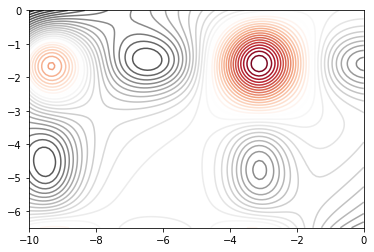

In [ ]:
# Ejemplo optimización

def funcion_objetivo(x_0, x_1):
    '''
    Para la región acotada entre −10<=x_0<=0 y −6.5<=x_1<=0 la función tiene
    múltiples mínimos locales y un único minimo global que se encuentra en
    f(−3.1302468,−1.5821422) = −106.7645367
    '''
    f = np.sin(x_1)*np.exp(1-np.cos(x_0))**2 \
        + np.cos(x_0)*np.exp(1-np.sin(x_1))**2 \
        + (x_0-x_1)**2
    return(f)

# Contour plot función objetivo
x_0 = np.linspace(start = -10, stop = 0, num = 100)
x_1 = np.linspace(start = -6.5, stop = 0, num = 100)
x_0, x_1 = np.meshgrid(x_0, x_1)
z = funcion_objetivo(x_0, x_1)
plt.contour(x_0, x_1, z, 35, cmap='RdGy');

In [ ]:
enjambre = Enjambre(
               n_particulas = 50,
               n_variables  = 2,
               limites_inf  = [-10, -6.5],
               limites_sup  = [0, 0],
               verbose      = False
            )

enjambre.optimizar(
    funcion_objetivo = funcion_objetivo,
    optimizacion     = "minimizar",
    n_iteraciones    = 250,
    inercia          = 0.8,
    reduc_inercia    = True,
    inercia_max      = 0.9,
    inercia_min      = 0.4,
    peso_cognitivo   = 1,
    peso_social      = 2,
    parada_temprana  = True,
    rondas_parada    = 5,
    tolerancia_parada = 10**-3,
    verbose          = False
)

Algoritmo detenido en la iteracion 87 por falta cambio absoluto mínimo de 0.001 durante 5 iteraciones consecutivas.
-------------------------------------------
Optimización finalizada 2021-10-23 23:07:05
-------------------------------------------
Duración optimización: 0.5675415992736816
Número de iteraciones: 87


In [ ]:
enjambre

         Enjambre
Número de partículas: 50
Límites inferiores de cada variable: [-10.   -6.5]
Límites superiores de cada variable: [0 0]
Optimizado: True
Iteraciones optimización: 87

Información mejor partícula:
----------------------------
Mejor posición actual: [-3.1234220077199293 -1.5885953892011202]
Mejor valor actual: -106.78763438680737

Resultados tras optimizar:
----------------------------
Posición óptima: [-3.1233836587626436 -1.5889855781111872]
Valor óptimo: -106.78768600871174

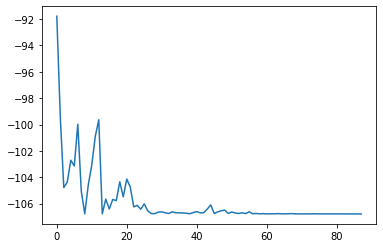

In [ ]:
# Evolución de la optimización
fig = plt.figure(figsize=(6,4))
enjambre.resultados_df['mejor_valor_enjambre'].plot()

In [ ]:
# Representación evolución partículas gráfico animado.

# Se extrae la posición de las partículas en cada iteración del enjambre
!pip install plotly_express
import plotly_express as px

def extraer_posicion(particula):
    posicion = particula.posicion
    return(posicion)

lista_df_temp = []

for i in np.arange(len(enjambre.historico_particulas)):
    posiciones = list(map(extraer_posicion, enjambre.historico_particulas[i]))
    df_temp = pd.DataFrame({"iteracion": i, "posicion": posiciones})
    lista_df_temp.append(df_temp)

df_posiciones = pd.concat(lista_df_temp)

df_posiciones[['x_0','x_1']] = pd.DataFrame(df_posiciones["posicion"].values.tolist(),
                                            index= df_posiciones.index)

df_posiciones.head()

,iteracion,posicion,x_0,x_1
0,0,"[-1.5166856366993695, -2.935640989819138]",-1.516686,-2.935641
1,0,"[-8.831806112694906, -5.975535677780353]",-8.831806,-5.975536
2,0,"[-3.9153931567511355, -5.388159666336401]",-3.915393,-5.388160
3,0,"[-4.073377932858067, -4.959944572030698]",-4.073378,-4.959945
4,0,"[-6.756143695192925, -1.6317807297088969]",-6.756144,-1.631781


In [ ]:
px.scatter(
    df_posiciones,
    x       = "x_0",
    y       = "x_1",
    range_x = [-10, 0],
    range_y = [-6.5, 0],
    animation_frame = "iteracion"
)

#Parte 2

Ciudades que se van a usar para esta sección

In [ ]:
berlin52 = np.array([[565,575],[25,185],[345,750],[945,685],[845,655],
            [880,660],[25,230],[525,1000],[580,1175],[650,1130],[1605,620],
            [1220,580],[1465,200],[1530,5],[845,680],[725,370],[145,665],
            [415,635],[510,875],[560,365],[300,465],[520,585],[480,415],
            [835,625],[975,580],[1215,245],[1320,315],[1250,400],[660,180],
            [410,250],[420,555],[575,665],[1150,1160],[700,580],[685,595],
            [685,610],[770,610],[795,645],[720,635],[760,650],[475,960],
            [95,260],[875,920],[700,500],[555,815],[830,485],[1170,65],
            [830,610],[605,625],[595,360],[1340,725],[1740,245]],float)

##Naive

In [ ]:
#Generamos ruta aleatoria
import random
from random import randint
from copy import deepcopy

In [ ]:
def cambio_ruta(ruta):
  random_route = []
  n = [i for i in range(len(ruta))]
  random.shuffle(n)
  for i in n:
    random_route.append(ruta[i])
  return random_route

In [ ]:
def distancia(a,b):
    return math.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)

In [ ]:
def total_distance(points):
    return sum([distancia(point, points[index + 1]) for index, point in enumerate(points[:-1])])

In [ ]:
mejorDist, dist = 50000, 0
mejorRuta = 0
is_smallest = 0
inicio = berlin52.tolist()
while True:
  y = cambio_ruta(inicio)
  dist = total_distance(y)
  is_smallest += 1
  if dist < mejorDist:
      mejorDist = dist
      mejorRuta = y
      is_smallest = 0
  orden_ciudades = y
  if is_smallest > 1000000:
      break
print(mejorRuta)

[[830.0, 610.0], [580.0, 1175.0], [760.0, 650.0], [25.0, 185.0], [725.0, 370.0], [555.0, 815.0], [475.0, 960.0], [835.0, 625.0], [575.0, 665.0], [415.0, 635.0], [595.0, 360.0], [565.0, 575.0], [685.0, 610.0], [845.0, 680.0], [605.0, 625.0], [145.0, 665.0], [25.0, 230.0], [95.0, 260.0], [525.0, 1000.0], [660.0, 180.0], [875.0, 920.0], [700.0, 500.0], [685.0, 595.0], [720.0, 635.0], [420.0, 555.0], [300.0, 465.0], [770.0, 610.0], [845.0, 655.0], [510.0, 875.0], [520.0, 585.0], [700.0, 580.0], [830.0, 485.0], [975.0, 580.0], [1220.0, 580.0], [1740.0, 245.0], [1605.0, 620.0], [1340.0, 725.0], [410.0, 250.0], [345.0, 750.0], [795.0, 645.0], [650.0, 1130.0], [880.0, 660.0], [945.0, 685.0], [480.0, 415.0], [560.0, 365.0], [1150.0, 1160.0], [1215.0, 245.0], [1170.0, 65.0], [1320.0, 315.0], [1250.0, 400.0], [1530.0, 5.0], [1465.0, 200.0]]


In [ ]:
def connectpoints(p1,p2):
    plt.plot([p1[0],p2[0]],[p1[1],p2[1]],'k-')

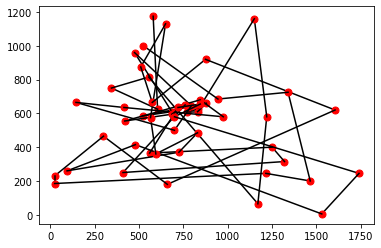

In [ ]:
for i in range(len(mejorRuta)):
    plt.plot(mejorRuta[i][0], mejorRuta[i][1] , marker='o', markersize=7, color="red")
    if i <= 50:
        connectpoints(mejorRuta[i], mejorRuta[i+1])

##Hill climbing

In [ ]:
def cartesian_matrix(coordinates):
    '''
    Creates a distance matrix for the city coords using straight line distances
    computed by the Euclidean distance of two points in the Cartesian Plane.
    '''
    matrix = {}
    for i, p1 in enumerate(coordinates):
        for j, p2 in enumerate(coordinates):
            matrix[i,j] = distancia(p1,p2)
    return matrix

In [ ]:
m = cartesian_matrix(berlin52.tolist())
for k, v in m.items():
    print(k, v)
print()

In [ ]:
def tour_length(matrix, tour):
    """Sum up the total length of the tour based on the distance matrix"""
    result = 0
    num_cities = len(list(tour))
    for i in range(num_cities):
        j = (i+1) % num_cities
        city_i = tour[i]
        city_j = tour[j]
        result += matrix[city_i, city_j]
    return result

In [ ]:
import random

def all_pairs(size, shuffle = random.shuffle):
    r1 = list(range(size))
    r2 = list(range(size))
    if shuffle:
        shuffle(r1)
        shuffle(r2)
    for i in r1:
        for j in r2:
            yield(i,j) # yield is an iterator function
            # for each call of the generator it returns the next value in yield

In [ ]:
from copy import deepcopy

# Tweak 1
def swapped_cities(tour):
    """
    Generator to create all possible variations where two 
    cities have been swapped
    """
    ap = all_pairs(len(tour))
    for i,j in ap:
        if i < j:
            copy = deepcopy(tour)
            copy[i], copy[j] = tour[j], tour[i]
            yield copy

# Tweak 2
def reversed_sections(tour):
    """
    Generator to return all possible variations where the
    section between two cities are swapped.
    It preserves entire sections of a route,
    yet still affects the ordering of multiple cities in one go.
    """
    ap = all_pairs(len(tour))
    for i,j in ap:
        if i != j:
            #print("indices from:",i, "to", j)
            copy = deepcopy(tour)
            if i < j:
                copy[i:j+1] = reversed(tour[i:j+1])
            else:
                copy[i+1:] = reversed(tour[:j])
                copy[:j] = reversed(tour[i+1:])
            if copy != tour: # not returning same tour
                yield copy

In [ ]:
def init_random_tour(tour_length):
    tour = list(range(tour_length))
    random.shuffle(list(tour))
    return tour

init_function = lambda: init_random_tour(52)
objective_function = lambda tour: tour_length(m, tour)

In [ ]:
def hc(init_function, move_operator, objective_function, max_evaluations, init_random):
    '''
    Hillclimb until either max_evaluations is 
    reached or we are at a local optima.
    '''
    if init_random:
        best = init_function()
    else:
        best = [i for i in range(52)]
    best_score = objective_function(best)
    
    num_evaluations = 1
    
    while num_evaluations < max_evaluations:
        # move around the current position
        move_made = False
        for next in move_operator(best):
            if num_evaluations >= max_evaluations:
                break
            
            next_score = objective_function(next)
            num_evaluations += 1
            if next_score < best_score:
                best = next
                best_score = next_score
                move_made = True
                break # depth first search
        if not move_made:
            break # couldn't find better move - must be a local max
    return (num_evaluations, best_score, best)


In [ ]:
import datetime
def do_hc_evaluations(evaluations , move_operator = swapped_cities, do_random_initial_state = True):
    max_evaluations = evaluations
    then = datetime.datetime.now()
    num_evaluations, best_score, best = hc(init_function, move_operator, objective_function, max_evaluations, do_random_initial_state)
    now = datetime.datetime.now()

    print("computation time ", now - then)
    print("best score:", best_score)
    print("best route:", best)

    return best

In [ ]:
move_operator = swapped_cities
#move_operator = reversed_sections
max_evaluations = 10000000
best_route = do_hc_evaluations(max_evaluations,move_operator, False)

computation time  0:00:00.463115
best score: 9764.331261568805
best route: [45, 36, 37, 47, 23, 4, 42, 9, 8, 32, 50, 10, 51, 13, 12, 26, 39, 44, 18, 40, 7, 14, 5, 3, 24, 11, 27, 25, 46, 28, 43, 33, 38, 35, 34, 0, 48, 31, 17, 2, 16, 6, 1, 41, 20, 30, 21, 22, 29, 19, 49, 15]


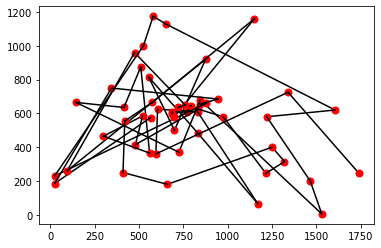

In [ ]:
for i in best_route:
    plt.plot(berlin52[i][0], berlin52[i][1] , marker='o', markersize=7, color="red")
    if i <= 50:
        connectpoints(berlin52[i], berlin52[i+1])

## Algoritmo genetico

In [ ]:
import numpy as np, random, operator, pandas as pd, matplotlib.pyplot as plt
from itertools import permutations
import math
random.seed(3)

In [ ]:
class City:
  def __init__(self, x, y):
    self.x = x
    self.y = y
  def distance(self, city):
    xDis = abs(self.x - city.x)
    yDis = abs(self.y - city.y)
    distance = np.sqrt((xDis ** 2) + (yDis ** 2))
    return distance
  def __repr__(self):
    return "(" + str(self.x) + "," + str(self.y) + ")"

In [ ]:
class Fitness:
  def __init__(self, route):
    self.route = route
    self.distance = 0
    self.fitness= 0.0
  def routeDistance(self):
    if self.distance ==0:
      pathDistance = 0
      for i in range(0, len(self.route)):
        fromCity = self.route[i]
        toCity = None
        if i + 1 < len(self.route):
          toCity = self.route[i + 1]
        else:
          toCity = self.route[0]
        pathDistance += fromCity.distance(toCity)
      self.distance = pathDistance
    return self.distance
  def routeFitness(self):
    if self.fitness == 0:
      self.fitness = 1 / float(self.routeDistance())
    return self.fitness

In [ ]:
def createRoute(cityList):
  route = random.sample(cityList, len(cityList))
  return route

In [ ]:
def initialPopulation(popSize, cityList):
  population = []
  for i in range(0, popSize):
    population.append(createRoute(cityList))
  return population


In [ ]:
def rankRoutes(population):
  fitnessResults = {}
  for i in range(0,len(population)):
    fitnessResults[i] = Fitness(population[i]).routeFitness()
  return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)

In [ ]:
def selection(popRanked, eliteSize):
  selectionResults = []
  df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
  df['cum_sum'] = df.Fitness.cumsum()
  df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()

  for i in range(0, eliteSize):
    selectionResults.append(popRanked[i][0])
  for i in range(0, len(popRanked) - eliteSize):
    pick = 100*random.random()
    for i in range(0, len(popRanked)):
      if pick <= df.iat[i,3]:
        selectionResults.append(popRanked[i][0])
        break
  return selectionResults


In [ ]:
def matingPool(population, selectionResults):
  matingpool = []
  for i in range(0, len(selectionResults)):
    index = selectionResults[i]
    matingpool.append(population[index])
  return matingpool

In [ ]:
def breed(parent1, parent2):
  child = []
  childP1 = []
  childP2 = []
  
  geneA = int(random.random() * len(parent1))
  geneB = int(random.random() * len(parent1))
  
  startGene = min(geneA, geneB)
  endGene = max(geneA, geneB)
  
  for i in range(startGene, endGene):
    childP1.append(parent1[i])
  childP2 = [item for item in parent2 if item not in childP1]
  child = childP1 + childP2
  return child

In [ ]:
def breedPopulation(matingpool, eliteSize):
  children = []
  length = len(matingpool) - eliteSize
  pool = random.sample(matingpool, len(matingpool))

  for i in range(0,eliteSize):
    children.append(matingpool[i])
  for i in range(0, length):
    child = breed(pool[i], pool[len(matingpool)-i-1])
    children.append(child)
  return children


In [ ]:
def mutate(individual, mutationRate):
  for swapped in range(len(individual)):
    if(random.random() < mutationRate):
      swapWith = int(random.random() * len(individual))

      city1 = individual[swapped]
      city2 = individual[swapWith]
      
      individual[swapped] = city2
      individual[swapWith] = city1
  return individual


In [ ]:
def mutatePopulation(population, mutationRate):
  mutatedPop = []
  
  for ind in range(0, len(population)):
    mutatedInd = mutate(population[ind], mutationRate)
    mutatedPop.append(mutatedInd)
  return mutatedPop

In [ ]:
def nextGeneration(currentGen, eliteSize, mutationRate):
  popRanked = rankRoutes(currentGen)
  selectionResults = selection(popRanked, eliteSize)
  matingpool = matingPool(currentGen, selectionResults)
  children = breedPopulation(matingpool, eliteSize)
  nextGeneration = mutatePopulation(children, mutationRate)
  return nextGeneration

In [ ]:
def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations):
  pop = initialPopulation(popSize, population)
  print("Initial distance: " + str(1 / rankRoutes(pop)[0][1]))
  
  for i in range(0, generations):
    pop = nextGeneration(pop, eliteSize, mutationRate)
  print("Final distance: " + str(1 / rankRoutes(pop)[0][1]))
  
  bestRouteIndex = rankRoutes(pop)[0][0]
  bestRoute = pop[bestRouteIndex]
  return bestRoute


In [ ]:
def geneticAlgorithmPlot(population, popSize, eliteSize, mutationRate, generations):
  pop = initialPopulation(popSize, population)
  progress = []
  progress.append(1 / rankRoutes(pop)[0][1])
  
  for i in range(0, generations):
    pop = nextGeneration(pop, eliteSize, mutationRate)
    progress.append(1 / rankRoutes(pop)[0][1])
  
  plt.plot(progress)
  plt.ylabel('Distance')
  plt.xlabel('Generation')
  plt.show()


In [ ]:
#Lista de ciudades
cityList = []
for ciudad in berlin52.tolist():
  cityList.append(City(x=ciudad[0], y=ciudad[1]))

In [ ]:
best_route = geneticAlgorithm(population=cityList, popSize=104, eliteSize=52, mutationRate=0.01, generations=100)


Initial distance: 25604.458557264985
Final distance: 16729.312678906575


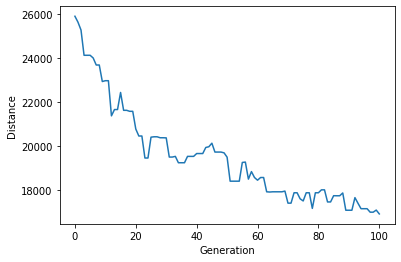

In [ ]:
geneticAlgorithmPlot(population=cityList, popSize=104, eliteSize=52, mutationRate=0.01, generations=100)


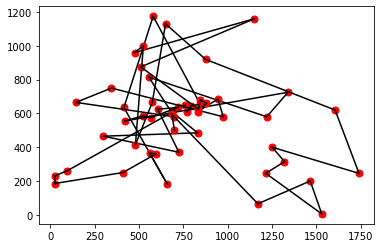

In [ ]:
for i,city in enumerate(best_route):
    plt.plot(city.x, city.y , marker='o', markersize=7, color="red")
    if i > 0:
        connectpoints([city.x, city.y], [last_city.x, last_city.y])
    last_city = city

##ACO (Colonia de hormigas)

 > iteration=1, best=11931
 > iteration=2, best=9972
 > iteration=3, best=9972
 > iteration=4, best=9692
 > iteration=5, best=9474
 > iteration=6, best=9035
 > iteration=7, best=8729
 > iteration=8, best=8669
 > iteration=9, best=8332
 > iteration=10, best=8289
 > iteration=11, best=8289
 > iteration=12, best=8229
 > iteration=13, best=8126
 > iteration=14, best=8126
 > iteration=15, best=8126
 > iteration=16, best=8126
 > iteration=17, best=8126
 > iteration=18, best=8126
 > iteration=19, best=8126
 > iteration=20, best=8055
 > iteration=21, best=8055
 > iteration=22, best=8055
 > iteration=23, best=8055
 > iteration=24, best=7791
 > iteration=25, best=7791
 > iteration=26, best=7791
 > iteration=27, best=7791
 > iteration=28, best=7791
 > iteration=29, best=7791
 > iteration=30, best=7791
 > iteration=31, best=7791
 > iteration=32, best=7791
 > iteration=33, best=7791
 > iteration=34, best=7791
 > iteration=35, best=7791
 > iteration=36, best=7791
 > iteration=37, best=7791
 > iterat

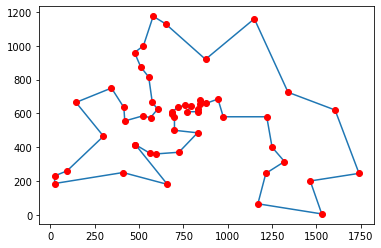

In [ ]:
max_it = 100 # maximum number of iterations
num_ants = 30  # number of ants
decay_factor = 0.6 # reduction of pheromone
c_heur = 2.5 # heuristic coefficient
c_hist = 1.0 # pheromone coefficient
# execute the algorithm
plt.ion()
fig = plt.figure()
best = ant_system(berlin52, max_it, num_ants, decay_factor, c_heur, c_hist)
print("Done.\nBest Solution: c=%g, v=%s" % (best['cost'], best['vector']))
plt.ioff()

In [ ]:
#Mejor distancia obtenida por ACO
best_route = [berlin52[i].tolist() for i in best['vector']]
print(total_distance(best_route))

7367.8662355310935


## PSO

In [ ]:
def read_cities_berlin():
  cities = []
  for c in berlin52.tolist():
    x,y = c[0], c[1]
    cities.append(City(x,y))
  return cities

initial cost is 8980.91827932919
cost: 8901.621860952788	| gbest: [(520.0,585.0), (565.0,575.0), (575.0,665.0), (605.0,625.0), (685.0,610.0), (685.0,595.0), (700.0,580.0), (720.0,635.0), (760.0,650.0), (770.0,610.0), (795.0,645.0), (830.0,610.0), (835.0,625.0), (845.0,655.0), (845.0,680.0), (880.0,660.0), (945.0,685.0), (975.0,580.0), (830.0,485.0), (700.0,500.0), (725.0,370.0), (595.0,360.0), (560.0,365.0), (480.0,415.0), (420.0,555.0), (415.0,635.0), (345.0,750.0), (510.0,875.0), (555.0,815.0), (475.0,960.0), (525.0,1000.0), (650.0,1130.0), (580.0,1175.0), (875.0,920.0), (1150.0,1160.0), (1340.0,725.0), (1220.0,580.0), (1250.0,400.0), (1320.0,315.0), (1215.0,245.0), (1170.0,65.0), (1465.0,200.0), (1530.0,5.0), (1740.0,245.0), (1605.0,620.0), (660.0,180.0), (410.0,250.0), (300.0,465.0), (145.0,665.0), (95.0,260.0), (25.0,230.0), (25.0,185.0)]


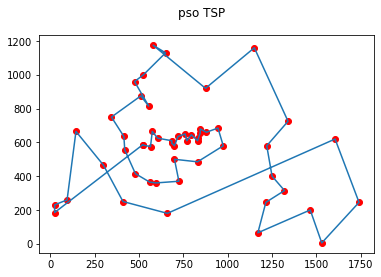

In [ ]:
cities = read_cities_berlin()
pso = PSO(iterations=1200, population_size=300, pbest_probability=0.9, gbest_probability=0.02, cities=cities)
pso.run()
print(f'cost: {pso.gbest.pbest_cost}\t| gbest: {pso.gbest.pbest}')

x_list, y_list = [], []
for city in pso.gbest.pbest:
    x_list.append(city.x)
    y_list.append(city.y)
x_list.append(pso.gbest.pbest[0].x)
y_list.append(pso.gbest.pbest[0].y)
fig = plt.figure(1)
fig.suptitle('pso TSP')

plt.plot(x_list, y_list, 'ro')
plt.plot(x_list, y_list)
plt.show(block=True)

## Comparación:


Los cuatro algorimos tienen su tiempo de costo y todos nos dieron soluciones diferentes, dentro de las cosas que podemos destacar para una comparación entre los 5 algoritmos que se utilizaron estan:

- La distancia total: esta es la que buscamos minimizar, para poder recorrer todas las ciudades en la menor distancia posible.

- El tiempo de coste: Es el tiempo que se tardó en correr el algoritmo.

Empezando por los tiempos de coste, el que se tardó el menor tiempo fue el algoritmo Hill climbing, ya que este depende exclusivamente de la cantidad de iteraciones que le indiquemos. Después sigue el algoritmo genético, el cual tardó 8 segundos en ejecutarse, este no nos ido una solución más óptima que el Hill climbing. Despues le siguen colonia de hormigas y PSO, en ese orden, los cuales nos dieron resultados mucho más óptimos que los dos anteriores y por último el algoritmo Naive, el cual tardó más de dos minutos en ejecutarse y nos dió la solución menos óptima.

Hablando de la distancia que nos dieron los algoritmos, la mejor por más de 1000 metros fue la de ACO, nos dió una distancia de 7367.8, y esta fue la tercera que nos dió el mejor tiempo. Después fue la de PSO, la cual nos dió una distancia de 8980.9, esta tardó menos que la de AOC, pero por unos segundos de coste podemos tener un mejor resultado. Ya después siguen las demas, las cuales nos dieron distancias mayores a 10000, por lo que no vale la pena usarlas si lo que se busca es recorrer la menor distancia.


# Conclusiones

**Luis Gabriel:** 

Para la cantidad de ciudades que se recorrieron en la parte 2 de este documento, el algoritmo de fuerza bruta no es nada viable, ya que son muchas las opciones y no acabaría nunca el código en recorrerlas todas, para esto el uso de estos algoritmos es una opción super viable.
Dentro de los algoritmos que recorrimos en esta actividad (ACO y PSO), los dos nos dan soluciones muy óptimas y en poco tiempo, por lo que son las mejores opciones para solucionar problemas TSP con muchas ciudades.
Hill Climbing nos dió una solución muy óptima cuando trabajamos con pocas ciudades, y nos dió la respuesta en un tiempo muy reducido. Por lo que en conclusión, para resolver el problema de TSP con muchas ciudades, AOC y PSO son las mejores soluciones mientras que para problemas con pocas ciudades, Hill Climbing es el que nos da el menor tiempo de ejecución y sin tanto coste computacional.

**Roel De la Rosa:**

Antes de intentar resolver un problema con alguno de los algoritmos que se presentaron, se debe de conocer bien el problema y las complejidades que este puede llegar a tener, esto debido a que cada uno de los algoritmos tienen distintas características y ventajas. Si se quiere conocer la solución óptima, el mejor algoritmo es el de fuerza bruta, pues este compara entre todas las soluciones y escoge la que mejor desempeño tenga de todas ellas, sin embargo este algoritmo tiene la desventaja de que, si hay muchas soluciones a evaluar, requiere mucho poder computacional para encontrar y comparar todas ellas. Es por ello que los otros algoritmos son tan utilizados, si bien no siempre encuentran la solución más óptima, suelen encontrar soluciones que tengan un muy buen rendimiento. En lo personal, una de los algoritmos que más me llamaron la atención fueron los PSO y ACO, pues toman elementos de los comportamientos de animales en la naturaleza para buscar soluciones factibles.

**Paola:**

Fue muy interesante revisar distintos algoritmos a lo largo del curso, con los contenidos que revisamos podemos identificar aquellos que se adecuen mejor a diferentes situaciones. En la segunda parte de este proyecto trabajamos con un problema TSP cuyas dimensiones hacían muy complicado aplicar el método de fuerza bruta para encontrar la solución óptima. Como podemos ver en los resultados los algoritmos hill climbing y el genetico no dieron tan buenas soluciones pero al menos estos últimos dos no tardaron tanto como colonia de hormigas, PSO y naive en ejecutarse. Para saber qué opción es la mejor habría que considerar los recursos con los que se cuentan y a qué se le quiere dar mayor prioridad, al tiempo de ejecución o a la mejor solución. En este caso, ya que no contamos con restricciones de tiempo o recursos, el mejor algoritmo a mi parecer es el de colonia de hormigas pues es el que menor distancia recorrida arrojó.

**Francisco:**

Todo problema se puede abordar con un algoritmo, pero claro que existen algoritmos que se acoplaran mejor a nuestro problema en cuestión, ya depende de nosotros saber cuando implementar cada uno.
Por ejemplo el TSP hace muy complicado trabajar con métodos como el de fuerza bruta o el de solución óptima.
Existen unos más rápidos que otros, pero eso ya depende de la finalidad que le queramos dar.
Con los algoritmos que trabajamos a lo largo de esta unidad formativa, vimos que basandonos en el comportamiento de la naturaleza podemos optimizar los tiempos en los que llegamos a soluciones óptimas, y aunque estas no siempre son la mejor solución, el tiempo en el que llegamos a estas nos ayuda a tomar mejores desiciones más rápido.

**José Andrés:**

Hicimos distintos algoritmos durante la clase los cuales nos permitieron realizar este proyecto, es interesante ver las diferencias que tiene cada uno, así como sus ventajas y desventajas. Podemos observar qué hay muchas soluciones posibles para cada problema, lo único que vimos cómo “dificultad” por así decirlo es que requieren mucho poder computacional lo cual no es muy beneficioso, pero gracias a que tenemos otros métodos y otros algoritmos siempre se llega a una buena solución. Sabemos qué hay unos más rápidos que otros pero creo que a la larga siempre será con el que mejor te acomodes, ya que todos tienen excelentes usos. Dependiendo de los recursos que se obtiene, cambiará el algoritmo que sea el mejor para cada escenario. En esta actividad nos dimos cuenta que AOC y PSO son unas excelentes soluciones para el problema que se nos presentó , mientras que cuando son problemas más chicos tenemos hill climbing lo cual es una excelente opción.

**Miguel Salas:**

El problema del agente viajero es ampliamente investigado en el campo de la optimización, debido a que sus aplicaciones son diversas. A lo largo de los años, se han utilizado múltiples algoritmos para solucionar el problema, aunque no todos lo logran resolver con un resultado óptimo. Algunos algoritmos como el de fuerza bruta arrojan muy buenos resultados, sin embargo requieren un gran costo computacional, por lo que se deben evaluar otras opciones que equilibren la relación resultado-costo. En nuestro proyecto, los algoritmos de hill climbing y genético no requirieron un gran tiempo de procesamiento, sin embargo, esto se puede ver reflejado en los resultados que arrojaron. Por otro lado, los algoritmos de AOC y PSO lograron un buen desempeño con relativamente buenos resultados. Por ello, al tratar de resolver un problema es importante buscar varias alternativas y no quedarse con la primera.